# Checkpoint 3

**Due: Friday, 29 November, 2024 at 4:00pm GMT**

Total points: 100

### Read This First
1. Enter your UID in the cell below according to the instructions there.

1. Use the constants provided in the cells. Do not use your own constants.

1. Wherever you see `raise NotImplementedError()`, remove that line and put your code there.

1. Put the code that produces the output for a given task in the cell indicated. You are welcome to add as many cells as you like for imports, function definitions, variables, etc. Do not alter the argument list of functions that are given to you.

1. Your notebook must run correctly when executed once from start to finish. Your notebook will be graded based on how it runs, not how it looks when you submit it. To test this, go to the *Kernel* menu and select *Restart & Run All*.

1. Once you are happy with it, clear the output by selecting *Restart & Clear Output* from the *Kernel* menu.

1. Submit through Noteable.

1. Unless otherwise stated, all code cells should run within 60 seconds.

# IMPORTANT 

In the following cell you must set the UID variable to be your student matriculation number (UUN), i.e.

`
UID=1769766
`

It must be an integer.

# Do not change it later

It will be used to generate the data that is different from other students. If you do not set it to the correct value, the marker will do so before grading.

In [1]:
UID = 2344216 # set it to your UUN number
# Checking it is integer
assert (type(UID) is int)

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import scipy.signal
import scipy.optimize
from scipy.integrate import solve_ivp
import time

In [3]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 14

![](p1.png)

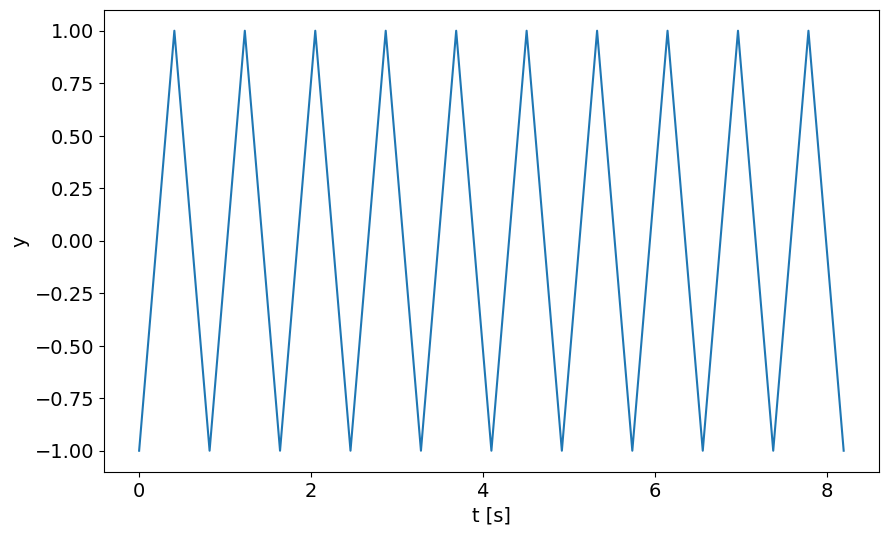

In [4]:
def load_signal():
    data = np.loadtxt("triangles.txt")
    n, d = 2001, (np.random.default_rng(UID).integers(0, 14, 79)[-5] % 7)
    return data[n*d:n*(d+1)].T
t, y = load_signal()
plt.plot(t, y)
plt.xlabel("t [s]")
plt.ylabel("y")
plt.show()

In [5]:
def problem1():
    N = len(t)
    tres = np.mean(np.diff(t))
    
    frequencies = np.fft.rfftfreq(N, tres)
    ck = np.abs(np.fft.rfft(y))
        
    peaks = scipy.signal.find_peaks(ck)[0]
    
    f0 = frequencies[peaks[0]]
    f0_ck = ck[peaks[0]]
    
    harmonic_f = frequencies[peaks]  #freq
    harmonic_a = ck[peaks]  # amps
    
    #greater then 1
    valid_indices = harmonic_a > 1
    amplitude_spectrum = harmonic_a[valid_indices] / f0_ck  #LHS of equation
    frequency_spectrum = harmonic_f[valid_indices] / f0  #RHS of equation
    
    def model_func(f, alpha):
        return f ** alpha
    
    fitp = scipy.optimize.curve_fit(model_func, frequency_spectrum, amplitude_spectrum)[0]
    alpha = fitp[0]
    
    #plotting
    fig, ax = plt.subplots()
    ax.loglog(frequencies, ck, label='Full Amplitude Spectrum', linestyle='--')
    ax.loglog(harmonic_f, harmonic_a, marker='o', color='g', linestyle='None', label='Harmonics')
    
    model_freq = harmonic_f / f0
    model_amp = model_func(model_freq, alpha) * f0_ck
    ax.loglog(harmonic_f, model_amp, label=f'alpha={alpha:.4f}')
    
    ax.set_xlabel('Frequency')  # no units
    ax.set_ylabel('Amplitude')  # no units
    ax.set_title('Amplitude Spectrum of Triangular Wave Signal')
    ax.legend()
    plt.show()
    
    return f0, alpha

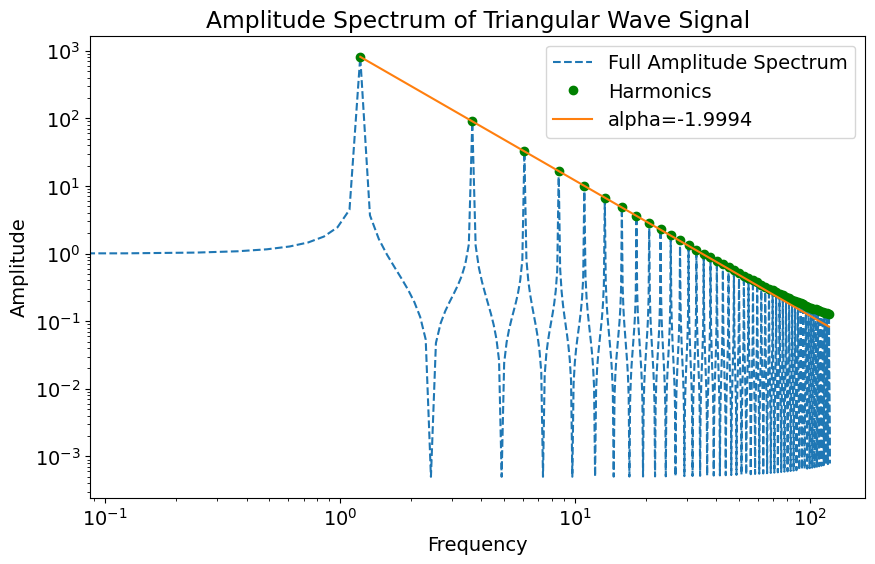

alpha = -1.9994092450800773
fundamental frequency = 1.2193903048475765 cycles/s


In [6]:
f0, alpha = problem1()
print (f"alpha = {alpha}")
print (f"fundamental frequency = {f0} cycles/s")

![](p2.png)

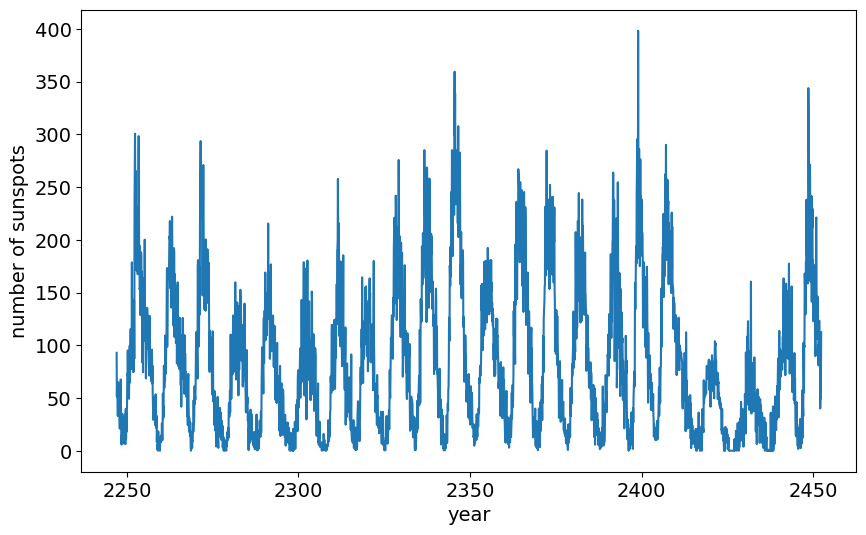

In [7]:
def load_sunspots():
    data = np.loadtxt("sunspots.txt")
    n, d = 2911, (np.random.default_rng(UID).integers(6, 16, 84)[78] % 3)
    return data[n*d:n*(d+1)].T
t, y = load_sunspots()
plt.plot(t, y)
plt.xlabel("year")
plt.ylabel("number of sunspots")
plt.show()

![](p2t1.png)

In [8]:
def problem2_task1():
    N = len(t)
    tres = np.mean(np.diff(t))
    
    frequencies = np.fft.rfftfreq(N, tres)
    ck = np.abs(np.fft.rfft(y))

    peak_freq_ind = np.argmax(ck[1:]) + 1 #exclude DC component
    peak_freq = frequencies[peak_freq_ind]

    T = 1 / peak_freq

    return T

In [9]:
pmax = problem2_task1()
print (f"The period is {pmax} years.")

The period is 9.336252686660428 years.


![](p2t2.png)

In [10]:
def problem2_task2():
    #smoothign
    gaus = scipy.signal.windows.gaussian(17, 9)
    ygaus = scipy.signal.fftconvolve(y, gaus, mode='same') / gaus.sum()

    T = problem2_task1()

    last_period_start = t.max() - T
    last_max_index = np.argmax(ygaus[t >= last_period_start])
    last_max = t[t >= last_period_start][last_max_index]
    last_max_ = t[last_max_index]

    # Predict the next maxima
    next_max = last_max + T

    # lats peak doesnt mean its THE max of the data and the max value in a cycle-  its just a peak and happens to be the last peak

    #finding month
    next_peak_year = int(next_max)
    next_peak_month_index = int((next_max - next_peak_year) * 12)
    months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    next_peak_month = months[next_peak_month_index]
    next_max_string = f"{next_peak_month} {next_peak_year}"

    #plotting
    amplitude = 0.5 * (np.max(ygaus) - np.min(ygaus))
    offset = 0.5 * (np.max(ygaus) + np.min(ygaus))

    cosgrid = np.linspace(last_max, next_max, 1000)
    coswave = amplitude * np.cos(2 * np.pi * (cosgrid - last_max) / T) + offset

    fig, ax = plt.subplots()

    ax.plot(t, y, label='Original Data')
    ax.plot(t, ygaus, label='Smoothed Data')
    ax.plot(cosgrid, coswave, label='Cos Wave')
    ax.set_xlabel("year")
    ax.set_ylabel("number of sunspots")
    ax.legend()
    ax.set_title("Sunspots Data with Smoothed Data and Cos Wave")
    plt.show()

    return next_max_string

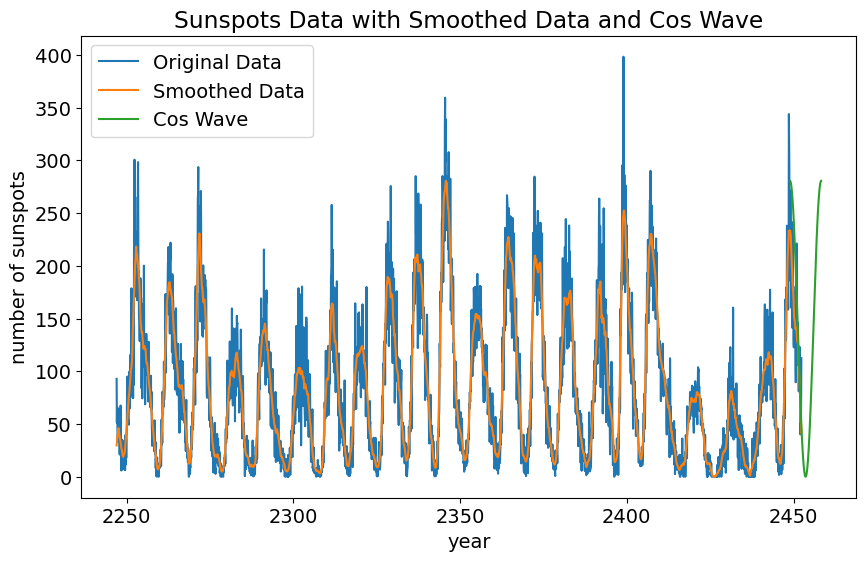

Next solar maximum in Apr 2458.


In [11]:
next_max = problem2_task2()
print (f"Next solar maximum in {next_max}.")

![](p3_1.png)

![](p3_2.png)

![](p3_3.png)

In [12]:
# baseball constants
m = 0.1451 # mass in kg
c = 23.21  # circumference in cm
r = c / 2 / np.pi / 100 # radius in m
A = np.pi * (r)**2 # cross-sectional area in m^2

# drag coefficients
CD0 = 0.2971
CD1 = 0.02921

# lift coefficients
CL0 = 0.5831
CL1 = 2.3331
CL2 = 1.1201

# Earth-related constants
rhoE = 1.181 # air density at sea level kg/m^3
g = 9.806651 # gravitational acceleration m/s^2

![](p3t1.png)

In [13]:
def case_1(t, f):
    """
    gravity.
    """
    vals = np.zeros_like(f)
    vals[0] = f[3] #vx
    vals[1] = f[4] #vy
    vals[2] = f[5] #vz
    vals[3] = 0
    vals[4] = 0
    vals[5] = -g
    return vals

def case_2(t, f):
    """
    Gravity and drag with CD0, no spin.
    """
    v = np.linalg.norm(f[3:6])  
    drag_force = -0.5 * CD0 * A * rhoE * v**2 * (f[3:6] / v) 
    
    vals = np.zeros_like(f)
    vals[0] = f[3]  
    vals[1] = f[4]  
    vals[2] = f[5]
    vals[3] = drag_force[0] / m  #Fx/m
    vals[4] = drag_force[1] / m  #Fy/m
    vals[5] = drag_force[2] / m - g  #Fz/m - g
    return vals

def case_3(t, f):
    """
    Gravity, drag, considering spin, no Magnus force.
    """
    v = np.linalg.norm(f[3:6]) 

    CD = CD0 + CD1 * (50 / 16.67)
    drag_force = -0.5 * CD * A * rhoE * v**2 * (f[3:6] / v) 
    
    vals = np.zeros_like(f)
    vals[0] = f[3]                 
    vals[1] = f[4]                 
    vals[2] = f[5]                 
    vals[3] = drag_force[0] / m    
    vals[4] = drag_force[1] / m  
    vals[5] = drag_force[2] / m - g  
    return vals

def case_4(t, f):
    """
    Gravity, drag, considering spin, and Magnus force.
    """
    v = np.linalg.norm(f[3:6])

    if v < 1e-10: 
        v_unit = np.zeros(3)
    else:
        v_unit = f[3:6] / v

    CD = CD0 + CD1 * (50 / 16.67)
    drag_force = -0.5 * CD * A * rhoE * v**2 * v_unit
        
    if v < 1e-10:
        S = 0
    else:
        S = (r * 50) / v  
    
    CL = (CL2 * S) / (CL0 + CL1 * S)
    
    omega_unit = np.array([1, 0, 0])
    omega_norm = np.linalg.norm(omega_unit)
    
    # Zero angular velocity handling
    if omega_norm < 1e-10:
        magnus_force = np.zeros(3)
    else:
        direction = np.cross(omega_unit, v_unit)
        magnus_force = 0.5 * A * rhoE * CL * v**2 * direction
    
    total_force = drag_force + magnus_force
    
    vals = np.zeros_like(f)
    vals[0] = f[3]                
    vals[1] = f[4]                 
    vals[2] = f[5]                 
    vals[3] = total_force[0] / m    
    vals[4] = total_force[1] / m    
    vals[5] = total_force[2] / m - g  
    return vals

def lands(t, f):
    return f[2] 

lands.terminal = True
lands.direction = -1

def problem3_task1(vi, theta):
    theta = np.radians(theta)
    v0_yz = vi * np.cos(theta)
    v0_z = vi * np.sin(theta)
    
    #Initial condition
    fi = np.array([0, 0, 1, 0, v0_yz, v0_z])
    
    #call and solve each case
    sol1 = solve_ivp(case_1, (0, 50), fi, events=lands, dense_output=True)
    sol2 = solve_ivp(case_2, (0, 50), fi, events=lands, dense_output=True)
    sol3 = solve_ivp(case_3, (0, 50), fi, events=lands, dense_output=True)
    sol4 = solve_ivp(case_4, (0, 50), fi, events=lands, dense_output=True)

    #time and linspave to plot
    tf1 = sol1.t_events[0][0]
    tf2 = sol2.t_events[0][0]
    tf3 = sol3.t_events[0][0]
    tf4 = sol4.t_events[0][0]
    
    t1 = np.linspace(0, tf1, 100)
    y1 = sol1.sol(t1)
    
    t2 = np.linspace(0, tf2, 100)
    y2 = sol2.sol(t2)
    
    t3 = np.linspace(0, tf3, 100)
    y3 = sol3.sol(t3)
    
    t4 = np.linspace(0, tf4, 100)
    y4 = sol4.sol(t4)

    #distance travelled
    disp1 = np.sqrt(y1[0,-1]**2 + y1[1,-1]**2)
    disp2 = np.sqrt(y2[0,-1]**2 + y2[1,-1]**2)
    disp3 = np.sqrt(y3[0,-1]**2 + y3[1,-1]**2)
    disp4 = np.sqrt(y4[0,-1]**2 + y4[1,-1]**2)

    #plot
    fig, ax = plt.subplots(figsize=(12, 8))
    
    ax.plot(np.sqrt(y1[0]**2 + y1[1]**2), y1[2], label='Only Gravity')
    ax.plot(np.sqrt(y2[0]**2 + y2[1]**2), y2[2], label='Gravity and Drag Forces')
    ax.plot(np.sqrt(y3[0]**2 + y3[1]**2), y3[2], label='Gravity, Drag, and Spin')
    ax.plot(np.sqrt(y4[0]**2 + y4[1]**2), y4[2], label='Gravity, Drag, Spin, and Magnus Forces')
    
    ax.set_xlabel("Ground Displacement [m]")
    ax.set_ylabel("Height [m]")
    ax.set_title("Projectile Motion Cases")
    ax.legend()
    
    plt.tight_layout()
    plt.show()
    
    return disp1, disp2, disp3, disp4

Below, the code will be tested. We will also test against additional secret inputs.

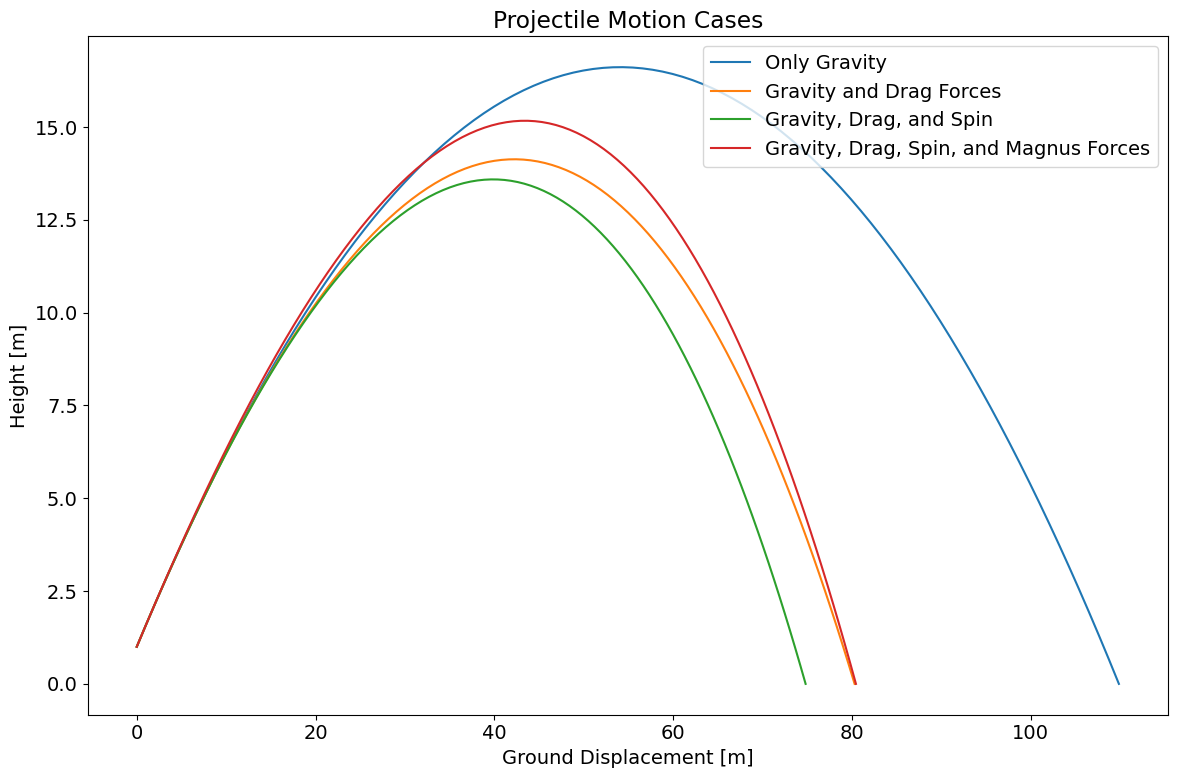

Distances: (109.88492991898876, 80.315844925181, 74.83329713195579, 80.46449724744369) m.
True distances: [109.88492991898876, 80.31584492518095, 74.83228998784594, 80.46328540954397] m.
Errors: [0.00000000e+00 4.26325641e-14 1.00714411e-03 1.21183790e-03] m.
4/4 correct.


In [14]:
def check_p3t1(vi, theta, answers):
    tol = 0.01
    dis = problem3_task1(vi, theta)
    print (f"Distances: {dis} m.")
    print (f"True distances: {answers} m.")
    err = np.abs(np.array(dis) - np.array(answers))
    print (f"Errors: {err} m.")
    good = err <= tol
    print(f"{good.sum()}/{good.size} correct.")

vi = 35 # m/s
theta = 30 # degrees
dis_true = [109.88492991898876, 80.31584492518095, 74.83228998784594, 80.46328540954397]
check_p3t1(vi, theta, dis_true)

![](p3t2.png)

In [15]:
def case_4_modified(t, f, spin):
    """
    Gravity, drag, considering spin, and Magnus force.
    """
    v = np.linalg.norm(f[3:6])

    if v < 1e-10: 
        v_unit = np.zeros(3)
    else:
        v_unit = f[3:6] / v

    CD = CD0 + CD1 * (spin / 16.67)
    drag_force = -0.5 * CD * A * rhoE * v**2 * v_unit
        
    if v < 1e-100:
        S = 0
    else:
        S = (r * spin) / v  
    
    CL = (CL2 * S) / (CL0 + CL1 * S)
    
    omega = np.array([spin, 0, 0])  
    omega_unit = omega / np.linalg.norm(omega)
    
    #if omega_unit < 1e-10:
        #magnus_force = np.zeros(3)
    #else:
    direction = np.cross(omega_unit, v_unit)
    magnus_force = 0.5 * A * rhoE * CL * v**2 * direction
    
    total_force = drag_force + magnus_force
    
    vals = np.zeros_like(f)
    vals[0] = f[3]                
    vals[1] = f[4]                 
    vals[2] = f[5]                 
    vals[3] = total_force[0] / m    
    vals[4] = total_force[1] / m    
    vals[5] = total_force[2] / m - g  
    return vals

def lands2(t, f, spin):
    return f[2]

lands2.terminal = True
lands2.direction = -1

def problem3_task2(vi_mean, vi_std, theta_mean, theta_std, spin_mean, spin_std, distance, tolerance):
    total_N = 0
    successful_N = 0
    
    rstate = np.random.default_rng(UID)
    theta_mean = np.radians(theta_mean)
    theta_std = np.radians(theta_std)
    
    while True:        
        vi = rstate.normal(vi_mean, vi_std)
        theta = rstate.normal(theta_mean, theta_std)
        spin = rstate.normal(spin_mean, spin_std)

        v0_y = vi * np.cos(theta)
        v0_z = vi * np.sin(theta)
        fi = [0, 0, 1, 0, v0_y, v0_z]

        sol = solve_ivp(case_4_modified, (0, 25), fi, args=(spin,), events=lands2, dense_output = True)
        y = sol.y[1]
        disp = y[-1]
        
        total_N += 1
        
        # print(f"Successes: {successful_N} Distance:{disp}", end = '\r')
        
        if disp > distance:
            successful_N += 1

        if successful_N > 0:
            relative_uncertainty = 1 / np.sqrt(successful_N)
            if relative_uncertainty <= tolerance:
                return successful_N / total_N

#0.008296460176991151
#0.008296460176991151
#0.008296460176991151

In [16]:
t1 = time.time()
val = problem3_task2(30, 5, 20, 10, 33.33, 33.33, 100, 0.15)
t2 = time.time()
print (f"Fraction is {val}.")
print (f"Computed in {t2-t1} seconds.")

Fraction is 0.008296460176991151.
Computed in 19.17742919921875 seconds.


![](p3t3.png)

In [45]:
def simulate_flight(v0, theta):
    theta_rad = np.radians(theta)
    vx = v0 * np.cos(theta_rad)
    vy = v0 * np.sin(theta_rad)
    initial_conditions = [0, 0, 1, vx, vy, 0]
    sol = solve_ivp(case_4, (0, 20), initial_conditions, events=lands, dense_output=True)
    return sol
    
def control_run():
    v0 = 70
    theta = 45
    theta_rad = np.radians(theta)
    vx = v0 * np.cos(theta_rad)
    vy = v0 * np.sin(theta_rad)  
    initial_conditions = [1, 0, 0, vx, vy, 0]  
    sol = solve_ivp(case_4, (0, 25), initial_conditions, events=lands, dense_output=True) 
    return sol

def diff_distance(v0, theta, target_distance):
    sol = simulate_flight(v0, theta)
    x_final = sol.y[0, -1]
    return x_final - target_distance

def find_speed(theta, target_distance, vmax):

    test = diff_distance(vmax, theta, target_distance)
    if test < 0: 
        return vmax
    return scipy.optimize.bisect(diff_distance, 1, vmax, args=(theta, target_distance))

def problem3_task3():
    control_sol = control_run()
    target_distance = control_sol.y[0, -1]
    
    def angle_objective(angle):
        return find_speed(angle, target_distance, 70)
    
    result = scipy.optimize.minimize_scalar(angle_objective, bounds=(0, 180), method='bounded')
    optimal_angle = result.x
    print(optimal_angle)
    
    min_speed = find_speed(optimal_angle, target_distance, 70)
    min_speed_sol = simulate_flight(min_speed, optimal_angle)
    
    tf_control = control_sol.t_events[0][0]
    t_control = np.linspace(0, tf_control, 100)
    y_control = control_sol.sol(t_control)
    
    tf_min_speed = min_speed_sol.t_events[0][0]
    t_min_speed = np.linspace(0, tf_min_speed, 100)
    y_min_speed = min_speed_sol.sol(t_min_speed)
    
    fig, ax = plt.subplots(figsize=(12, 8))
    ground_disp_control = np.sqrt(y_control[0]**2 + y_control[1]**2)
    ground_disp_min = np.sqrt(y_min_speed[0]**2 + y_min_speed[1]**2)
    
    ax.plot(ground_disp_control, y_control[2], label='Control Run')
    ax.plot(ground_disp_min, y_min_speed[2], label='Minimum Speed Run')
    ax.set_xlabel("Ground Displacement [m]")
    ax.set_ylabel("Height [m]")
    ax.set_title("Projectile Motion Comparison")
    ax.legend()
    plt.show()
    
    return min_speed
#ran out of time couldnt figure it out

0.08872891720738926


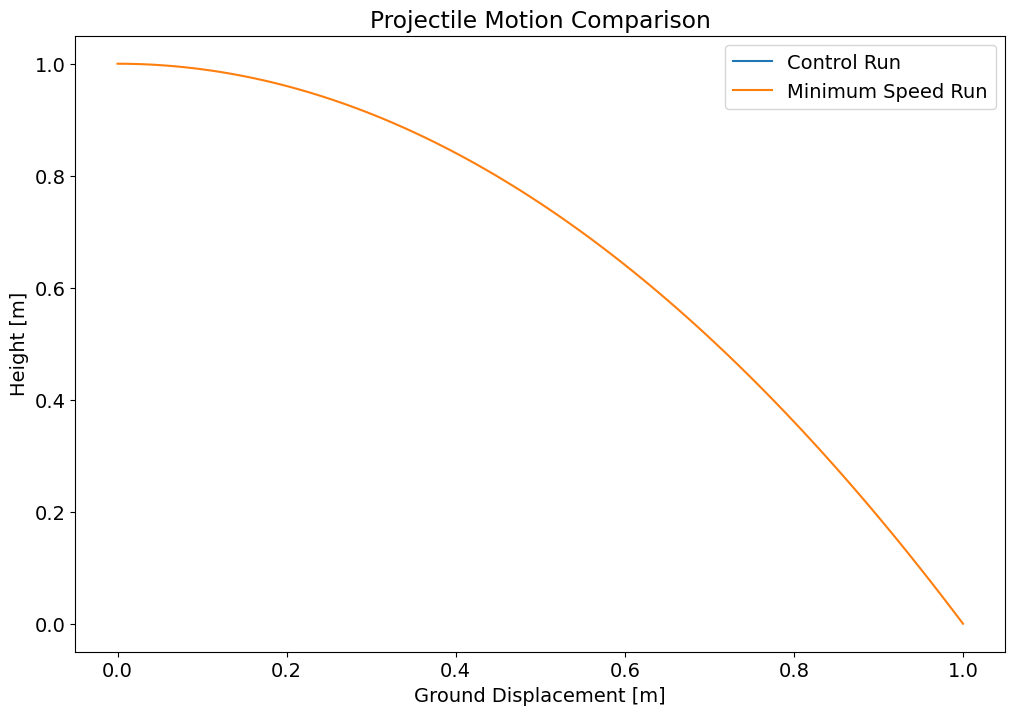

Minimum initial velocity: 2.2201271400698204 m/s
Computed in 2.8655712604522705 seconds.


In [46]:
t1 = time.time()
vmin = problem3_task3()
print (f"Minimum initial velocity: {vmin} m/s")
t2 = time.time()
print (f"Computed in {t2-t1} seconds.")